In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns  
import plotly.express as px


In [17]:
# read the data
df= pd.read_csv("HR-Employee-Attrition.csv")

In [18]:
# print top 5 rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
# print column names
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [20]:
# check data type
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [21]:
# find the null value in the data
df.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

from the above data we can see that there is no null value in the data

In [22]:
# find the duplicate value in the data
df.duplicated().any()

False

Exploratory Data Analysis

In [23]:
#  How is attrition depend on age
age_att  = df.groupby(["Age" , "Attrition"]).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

px.line(age_att,x='Age',y='Counts',color='Attrition',title='Agewise Counts of People in an Organization')


In [24]:
# Income wise attriton of the employees
income_att = df.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
income_att['MonthlyIncome']=round(income_att['MonthlyIncome'],-3)
rate_att=income_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')

px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income basis counts of People in an Organization')


In [25]:
# Department wise attrition of the employees
dept_attr = df.groupby(["Department", "Attrition"]).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name = "Counts")
px.bar(dept_attr,x='Department',y='Counts',color='Attrition',title='Department wise Counts of People in an Organization')


Text(0.5, 1.0, 'Over Time Comparison wrt Gender')

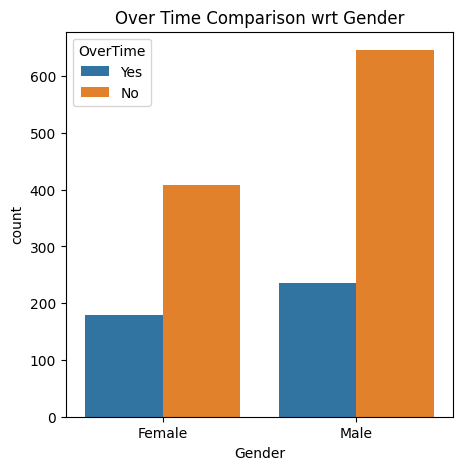

In [26]:
# overtime based on Gender
sns.countplot(x='Gender', hue='OverTime' , data=df) 
fig= plt.gcf() 
fig.set_size_inches(5,5) 
plt.title('Over Time Comparison wrt Gender')

Text(0.5, 1.0, 'Job Role')

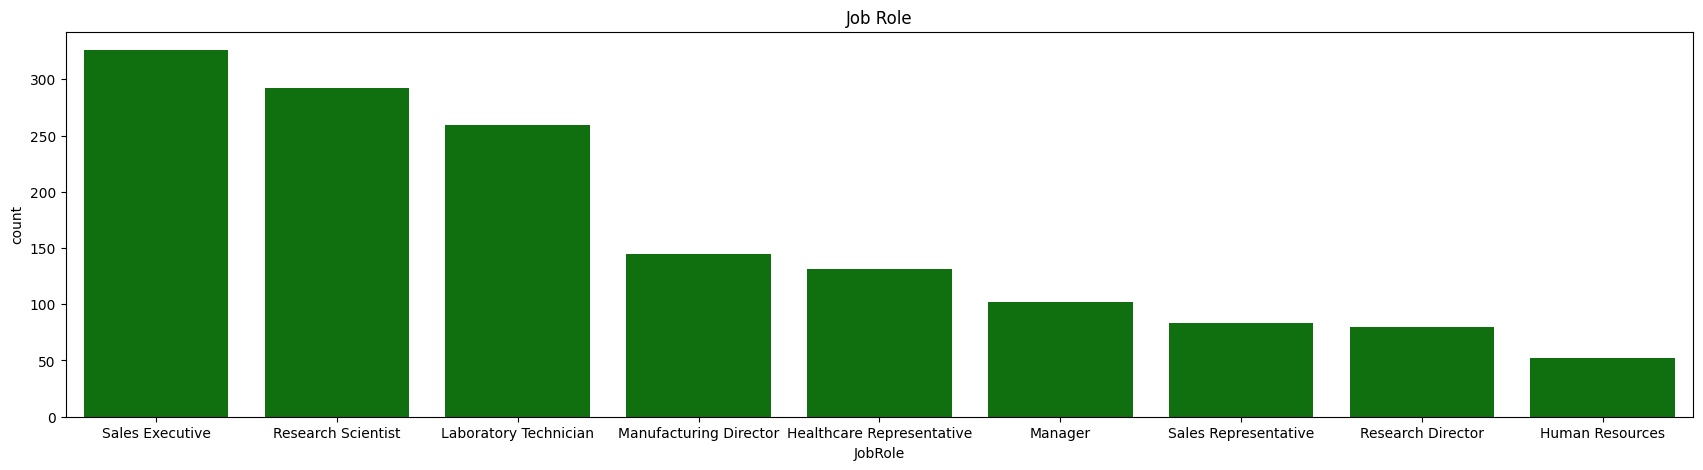

In [27]:

sns.countplot(x= 'JobRole', data=df, color = "green") 
fig= plt.gcf() 
fig.set_size_inches(21,5) 
plt.title('Job Role')

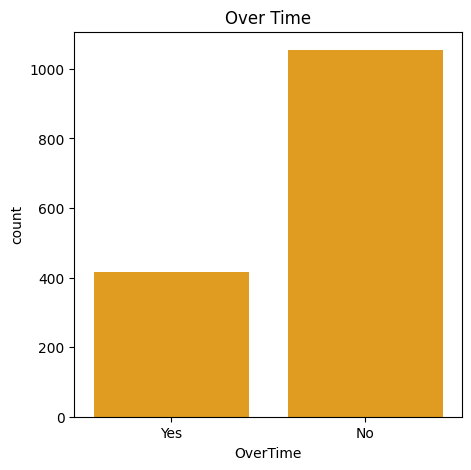

In [28]:
# overtime of the employees
sns.countplot(x='OverTime', data=df, color = "orange") 
fig= plt.gcf()
fig.set_size_inches(5,5) 
plt.title('Over Time')
plt.show()

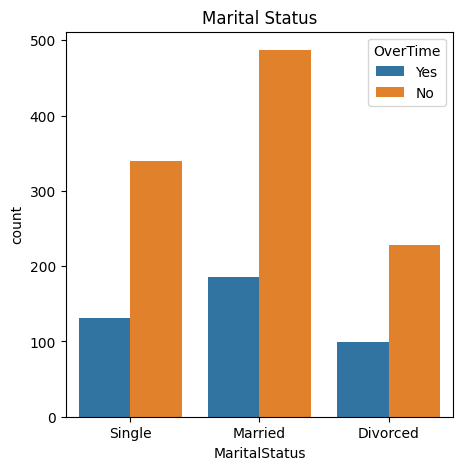

The employee ids of people who are single are as below:



0          1
2          4
5          8
8         12
11        15
        ... 
1454    2046
1455    2048
1460    2054
1463    2057
1464    2060
Name: EmployeeNumber, Length: 470, dtype: int64

In [29]:

# overtime on the basis of Marital status
sns.countplot(x='MaritalStatus', hue='OverTime', data=df) 
fig= plt.gcf() 
fig.set_size_inches(5,5) 
plt.title('Marital Status')  
plt.show()

#getting the employee ids of the people who are the singles   
singles= df.loc[df['MaritalStatus'] == 'Single'] 
print("The employee ids of people who are single are as below:\n")
singles['EmployeeNumber'] 